<a href="https://colab.research.google.com/github/Debottam/MachinLearningEx/blob/master/CustomizedAPi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)

tf version:  2.3.0
keras version:  2.4.0


In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape
Y_train.shape

(60000,)

In [57]:
Y_train = np.array(Y_train).astype(np.float32)
Y_test = np.array(Y_test).astype(np.float32)
Y_train

array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

In [5]:
#preprocessing
X_train = X_train/255.
X_test = X_test/255.

In [6]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=[28,28]),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3.5530 - accuracy: 0.1719
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2018 - accuracy: 0.1946
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0334 - accuracy: 0.1978
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9361 - accuracy: 0.2005
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8463 - accuracy: 0.2009
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7831 - accuracy: 0.2013
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7395 - accuracy: 0.2022
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7066 - accuracy: 0.2031
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6774 - accuracy: 0.2036
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.644

In [ ]:
X = X_test[0]
X.shape
X = X.reshape(1,28,28)
X.shape

(1, 28, 28)

In [ ]:
model.predict(X)

array([[6.7597446]], dtype=float32)

In [ ]:
Y_test[0]

7

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

<function matplotlib.pyplot.show>

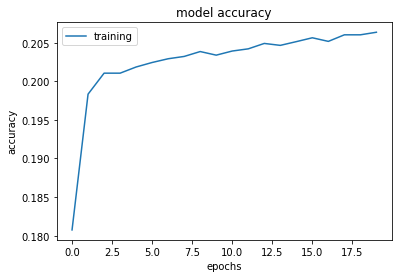

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['training'])
plt.show

<function matplotlib.pyplot.show>

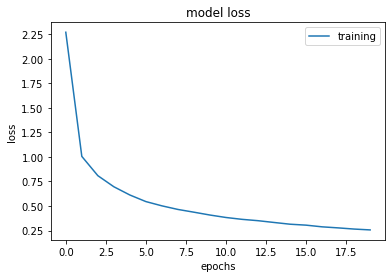

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['training'])
plt.show

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.2066


[0.531632661819458, 0.20659999549388885]

In [10]:
tf.square([-2., 0., 3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 0., 9.], dtype=float32)>

In [120]:
def mse_fn(y_true, y_pred):
  #print("y_true: ", y_true.shape)
  #print("y_pred: ", y_pred.shape)
  #print("y_true: ", y_true)
  #print("y_pred: ", y_pred)
  error = y_true - y_pred
  #print("error: ", error)
  mserror = tf.reduce_mean(tf.square(error))
  return mserror

In [26]:
class mse_fn_class(keras.losses.Loss):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    mserror = tf.reduce_mean(tf.square(error))
    return mserror

In [12]:
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)
  
  def build(self, batch_input_shape):
    self.kernel = self.add_weight(name = "kernel", shape=[batch_input_shape[-1], self.units], initializer="glorot_normal")
    self.bias = self.add_weight(name = "bias", shape=[self.units], initializer = 'zeros')
    super().build(batch_input_shape)

  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)
  
  def compute_output_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "units":self.units, "activation": keras.activations.serialize(self.activation)}

In [122]:
class DNN_model(keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Flatten(input_shape = [28, 28])
    self.hidden2 = MyDense(32, activation='relu')
    self.hidden3 = MyDense(16, activation='relu')
    self.hidden4 = MyDense(8, activation='relu')
    self.hidden5 = MyDense(output_dim, activation='relu')
  
  def call(self, inputs):
    Z = self.hidden1(inputs)
    Z = self.hidden2(Z)
    Z = self.hidden3(Z)
    Z = self.hidden4(Z)
    Z = self.hidden5(Z)
    return Z

In [74]:
model_cust = DNN_model(1)

In [ ]:
model_cust.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [75]:
input_shape = (None, 28, 28)
model_cust.build(input_shape)
model_cust.summary()

Model: "dnn_model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
my_dense_56 (MyDense)        multiple                  25120     
_________________________________________________________________
my_dense_57 (MyDense)        multiple                  528       
_________________________________________________________________
my_dense_58 (MyDense)        multiple                  136       
_________________________________________________________________
my_dense_59 (MyDense)        multiple                  9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_cust.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3923 - accuracy: 0.1678
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0485 - accuracy: 0.1944
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8358 - accuracy: 0.1975
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7230 - accuracy: 0.1996
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6424 - accuracy: 0.2002
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5815 - accuracy: 0.2010
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5249 - accuracy: 0.2023
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4864 - accuracy: 0.2027
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4544 - accuracy: 0.2030
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.419

In [ ]:
model_cust.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 943us/step - loss: 0.5641 - accuracy: 0.2071


[0.5641304850578308, 0.2071000039577484]

In [123]:
model_cust_loss = DNN_model(1)
#model_cust_loss.compile(optimizer='adam', loss = mse_fn, metrics=['accuracy'])

In [114]:
input_shape = (None, 28, 28)
model_cust_loss.build(input_shape)
model_cust_loss.summary()

Model: "dnn_model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         multiple                  0         
_________________________________________________________________
my_dense_64 (MyDense)        multiple                  25120     
_________________________________________________________________
my_dense_65 (MyDense)        multiple                  528       
_________________________________________________________________
my_dense_66 (MyDense)        multiple                  136       
_________________________________________________________________
my_dense_67 (MyDense)        multiple                  9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [115]:
history = model_cust_loss.fit(X_train, Y_train, epochs=20 , batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1894 - accuracy: 0.1825
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9855 - accuracy: 0.2002
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7960 - accuracy: 0.2022
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6821 - accuracy: 0.2034
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6060 - accuracy: 0.2043
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5428 - accuracy: 0.2048
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4893 - accuracy: 0.2061
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4588 - accuracy: 0.2061
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4237 - accuracy: 0.2068
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.383

In [66]:
model_cust_loss.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.2078


[0.6127731204032898, 0.2078000009059906]

In [79]:
# Custom loop

def random_batch(X, y, batch_size=32):
  idx = np.random.randint(len(X), size=batch_size)
  return X[idx], y[idx]

def print_status_bar(iteration, total, loss, metrics=None):
  metrics= "-".join(["{:.4f}".format(m.result()) for m in [loss]+(metrics or [])])
  end = "" if iteration < total else "\n"
  print("\r{}/{}-".format(iteration, total)+metrics,end=end)

In [130]:
n_epochs = 30
batch_size = 32
n_steps = len(X_train)//batch_size
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.mean_squared_error 
mean_loss = keras.metrics.Mean() 
metrics = [keras.metrics.MeanAbsoluteError()]
print("n_steps: ", n_steps)

n_steps:  1875


In [ ]:
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, wd)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [132]:
epoch_losses = []
for epoch in range (1,n_epochs+1):
  print("Epoch {}/{}".format(epoch, n_epochs))
  batch_losses = []
  for step in range(1, n_steps+1):
    #print("step:",step)
    X_batch, Y_batch = random_batch(X_train, Y_train, batch_size = 32)
    with tf.GradientTape() as tape:
      Y_pred = model_cust_loss(X_batch, training=True)
      current_loss = mse_fn(Y_batch, Y_pred) 
      #print("loss shape: ", loss.shape)
      #loss_reduced = tf.reduce_mean(mse_fn(Y_batch,Y_pred))
      #print("loss_reduced: ", loss_reduced)
      gradients = tape.gradient(current_loss, model_cust_loss.trainable_variables)
    batch_losses.append(current_loss)
    current_loss.reset_states()
    optimizer.apply_gradients(zip(gradients,model_cust_loss.trainable_variables))
  epoch_losses.append(np.mean(batch_losses))
  print("loss:",epoch_losses[epoch-1])

Epoch 1/30


AttributeError: ignored